In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input,Dense,Conv2D,Activation,ZeroPadding2D,BatchNormalization,Flatten
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.initializers import glorot_uniform

C:\Users\aditya\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
xtr=mnist.train.images.reshape(55000,28,28,1)
ytr=mnist.train.labels
xts=mnist.test.images.reshape(10000,28,28,1)
yts=mnist.test.labels
print('xtr='+str(xtr.shape))
print('ytr='+str(ytr.shape))
print('xts='+str(xts.shape))
print('yts='+str(yts.shape))

xtr=(55000, 28, 28, 1)
ytr=(55000, 10)
xts=(10000, 28, 28, 1)
yts=(10000, 10)


In [30]:
def model(input_shape):
    x_input=Input(input_shape)
    
    x=Conv2D(10,(5,5),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0))(x_input)
    x=BatchNormalization(axis=3)(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3))(x)
    
    x=Conv2D(32,(3,3),strides=(1,1),padding='valid',kernel_initializer=glorot_uniform(seed=1))(x)
    x=BatchNormalization(axis=3)(x)
    x=Activation('relu')(x)
    x=MaxPooling2D((3,3))(x)
    

    x=Flatten()(x)
    x=Dense(10,activation='softmax')(x)
    model=Model(inputs=x_input,outputs=x)
    return model
    

In [31]:
mod=model((28,28,1))

In [32]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
mod.fit(x=xtr,y=ytr,epochs=5,batch_size=16)

Epoch 1/5
55000/55000 [==============================] - 44s 799us/step - loss: 0.1960 - acc: 0.9453
Epoch 2/5
55000/55000 [==============================] - 41s 738us/step - loss: 0.0652 - acc: 0.9801
Epoch 3/5
55000/55000 [==============================] - 40s 720us/step - loss: 0.0510 - acc: 0.9837
Epoch 4/5
55000/55000 [==============================] - 40s 724us/step - loss: 0.0429 - acc: 0.9867
Epoch 5/5
55000/55000 [==============================] - 45s 814us/step - loss: 0.0369 - acc: 0.9882


In [34]:
mod.evaluate(x=xts,y=yts)

10000/10000 [==============================] - 2s 231us/step


[0.041903258751379326, 0.9865]

predicted value = 8


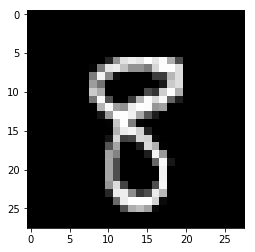

In [108]:
n=np.random.randint(1,10000)
im=xts[n,:,:,:].reshape(28,28)
plt.imshow(im,cmap='gray')

prediction=np.argmax(mod.predict(im.reshape(1,28,28,1)))
print("predicted value = "+str(prediction))